In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [90]:
from sklearn.linear_model import Ridge #import Ridge from sklearn
from sklearn.datasets import load_boston #import boston house price dataset
#from sklearn.datasets import fetch_california_housing
from sklearn import metrics #import metrics from sklearn for evaluation
from sklearn.model_selection import train_test_split #import train_test_split
from sklearn import preprocessing #import preprocessing package


In [92]:
data_boston=load_boston()#load boston house price data
#print(data_boston)
print(data_boston.DESCR)
X=data_boston.data #Get X values from dataset
Y=data_boston.target #Get Y values from dataset
#print(X)
[print('{:f}'.format(x)) for x in X[505]] # Display each feature value of the first observation as floats
print(Y)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [72]:
model=LinearRegression()
X_train=X_train[:,5] #Selecting first 5 features only
print(X_train)

[6.185 5.813 6.172 5.983 6.474 5.85  6.943 6.437 5.872 6.254 6.546 7.178
 6.538 4.903 4.906 5.52  6.212 6.826 6.951 6.749 5.019 6.683 5.878 6.251
 6.319 5.569 5.887 5.987 6.8   6.718 6.229 6.411 6.13  6.442 5.012 6.879
 7.236 6.167 6.433 6.101 8.375 6.975 7.412 6.273 6.122 6.525 8.259 5.731
 7.088 6.495 5.762 6.395 5.349 7.686 7.52  7.358 4.652 6.484 5.841 7.287
 6.151 4.97  6.226 6.209 6.38  5.927 6.715 7.079 7.014 6.012 8.78  6.976
 7.241 6.066 6.122 6.315 5.747 5.604 6.382 6.377 4.368 6.137 6.619 5.966
 5.782 5.877 6.162 7.041 6.549 7.274 6.794 5.628 6.405 4.926 6.193 6.565
 5.856 5.093 6.163 5.468 6.606 6.854 8.069 6.728 5.961 6.563 7.61  6.108
 5.871 6.59  5.663 5.757 5.852 6.23  5.986 6.616 6.618 5.648 6.373 5.637
 5.565 7.148 5.706 6.968 6.242 6.127 5.79  6.009 7.016 5.935 5.913 6.98
 4.973 6.54  6.316 5.905 5.936 8.247 6.567 5.854 5.942 7.107 7.333 8.337
 5.928 5.87  5.884 8.266 4.138 5.968 5.693 6.453 6.434 6.127 4.138 6.417
 5.822 3.863 6.069 5.67  6.29  7.923 6.63  6.358 7.8

In [73]:
X_train=X_train.reshape(-1,1)#Reshape the dimension into a 339 X 1 vector
#Number of train samples = 67% of total samples = 67% of 504 = 339 approx. 
#X_train=X_train.reshape(339,1)
print(X_train)

[[6.185]
 [5.813]
 [6.172]
 [5.983]
 [6.474]
 [5.85 ]
 [6.943]
 [6.437]
 [5.872]
 [6.254]
 [6.546]
 [7.178]
 [6.538]
 [4.903]
 [4.906]
 [5.52 ]
 [6.212]
 [6.826]
 [6.951]
 [6.749]
 [5.019]
 [6.683]
 [5.878]
 [6.251]
 [6.319]
 [5.569]
 [5.887]
 [5.987]
 [6.8  ]
 [6.718]
 [6.229]
 [6.411]
 [6.13 ]
 [6.442]
 [5.012]
 [6.879]
 [7.236]
 [6.167]
 [6.433]
 [6.101]
 [8.375]
 [6.975]
 [7.412]
 [6.273]
 [6.122]
 [6.525]
 [8.259]
 [5.731]
 [7.088]
 [6.495]
 [5.762]
 [6.395]
 [5.349]
 [7.686]
 [7.52 ]
 [7.358]
 [4.652]
 [6.484]
 [5.841]
 [7.287]
 [6.151]
 [4.97 ]
 [6.226]
 [6.209]
 [6.38 ]
 [5.927]
 [6.715]
 [7.079]
 [7.014]
 [6.012]
 [8.78 ]
 [6.976]
 [7.241]
 [6.066]
 [6.122]
 [6.315]
 [5.747]
 [5.604]
 [6.382]
 [6.377]
 [4.368]
 [6.137]
 [6.619]
 [5.966]
 [5.782]
 [5.877]
 [6.162]
 [7.041]
 [6.549]
 [7.274]
 [6.794]
 [5.628]
 [6.405]
 [4.926]
 [6.193]
 [6.565]
 [5.856]
 [5.093]
 [6.163]
 [5.468]
 [6.606]
 [6.854]
 [8.069]
 [6.728]
 [5.961]
 [6.563]
 [7.61 ]
 [6.108]
 [5.871]
 [6.59 ]
 [5.663]
 

In [74]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
X_test=X_test[:,5]
X_test=X_test.reshape(-1,1)

In [77]:
Y_pred=model.predict(X_test)

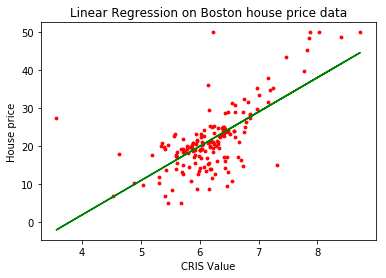

	Red dotes indicate the actual values in the test set
	Green line denotes the predicted regression line



In [78]:
#Put title
plt.title("Linear Regression on Boston house price data")
#Put label in x axis
plt.xlabel("CRIS Value")
#Put label in y axis
plt.ylabel("House price")
'''
Scatter the correct values with features in the test set
color:Color of the scatter points
s :Size of the scatter points
'''
plt.scatter(X_test,y_test,color = 'red',s=8)
'''
Plot the predicted values with features in the test set
Drawing the regression line
color : Color of the regression line
'''
plt.plot(X_test,Y_pred, color = 'green')
plt.show()
print('\tRed dotes indicate the actual values in the test set')
print('\tGreen line denotes the predicted regression line\n')

In [79]:
'''
calculate MAE
Mean Absolute Error (MAE): MAE measures the average magnitude of the errors
in a set of predictions, without considering their direction
'''
print("\tMean_absolute_error :",metrics.mean_absolute_error(y_test, Y_pred))



	Mean_absolute_error : 4.271512885857222


In [80]:
'''
calculate MSE
Mean Squared Error (MSE) measures the average of the squares of the errors
'''
print("\tMean_squared_error :",metrics.mean_squared_error(y_test, Y_pred))


	Mean_squared_error : 39.09105111486995


In [81]:
'''
calculate RMSE
Root mean squared error (RMSE): RMSE is a quadratic scoring rule
that measures the average
magnitude of the error.
It’s the square root of the average of squared differences between
prediction and actual observation
'''
print("\tRoot mean_squared_error :",np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))


	Root mean_squared_error : 6.25228367197698


In [82]:
'''
R-squared is a statistical measure of how close the data are to the
fitted regression line
'''
print("\tR-squared measure :",metrics.r2_score(y_test, Y_pred))

	R-squared measure : 0.4834590168919488


# Regularization / Ridge Regression

In [83]:
'''
Ridge regression
Initialize Ridge object
alpha : Indicates regularization strength
normalize : True/False. Which indicates the L2 normalization order
refer : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
'''
ridgeReg = Ridge(alpha=0.05, normalize=True)


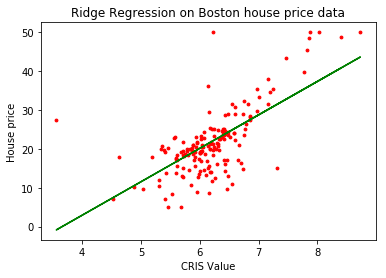

	Red dots indicate the actual values in the test set
	Green line denotes the predicted regression line

	Mean_absolute_error : 4.301209060884168
	Mean_squared_error : 39.26068740616176
	Root mean_squared_error : 6.2658349328849825
	R-squared measure : 0.48121747837672224


In [84]:
#Train the Ridge object using X_train and y_train
ridgeReg.fit(X_train,y_train)
Y_pred= ridgeReg.predict(X_test)
#Put title
plt.title("Ridge Regression on Boston house price data")
#Put label in x axis
plt.xlabel("CRIS Value")
#Put label in y axis
plt.ylabel("House price")
#Scatter the correct values with features in the test set
plt.scatter(X_test,y_test,color = 'red',s=8)
#Plot the predicted values with features in the test set
plt.plot(X_test,ridgeReg.predict(X_test), color = 'green')
plt.show()
print('\tRed dots indicate the actual values in the test set')
print('\tGreen line denotes the predicted regression line\n')
print("\tMean_absolute_error :",metrics.mean_absolute_error(y_test, Y_pred))
print("\tMean_squared_error :",metrics.mean_squared_error(y_test, Y_pred))
print("\tRoot mean_squared_error :",np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print("\tR-squared measure :",metrics.r2_score(y_test, Y_pred))
